In [0]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('mattplot: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Numpy: 1.18.2
pandas: 1.0.3
mattplot: 3.2.1
seaborn: 0.10.0
scipy: 1.4.1
sklearn: 0.22.2.post1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Load the dataset
data = pd.read_csv('creditcard.csv')

In [0]:
#explore data
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [0]:
print(data.shape)

(43664, 31)


In [0]:
print(data.describe())

              Time            V1  ...        Amount         Class
count  43664.00000  43664.000000  ...  43663.000000  43663.000000
mean   26888.25284     -0.233273  ...     90.313927      0.003069
std    12814.99066      1.881487  ...    238.441952      0.055314
min        0.00000    -56.407510  ...      0.000000      0.000000
25%    18719.75000     -0.980241  ...      7.570000      0.000000
50%    31883.00000     -0.244783  ...     24.890000      0.000000
75%    36950.00000      1.158119  ...     81.555000      0.000000
max    41600.00000      1.960497  ...   7879.420000      1.000000

[8 rows x 31 columns]


In [0]:
data=data.sample(frac=0.1,random_state=1)
print(data.shape)

(4366, 31)


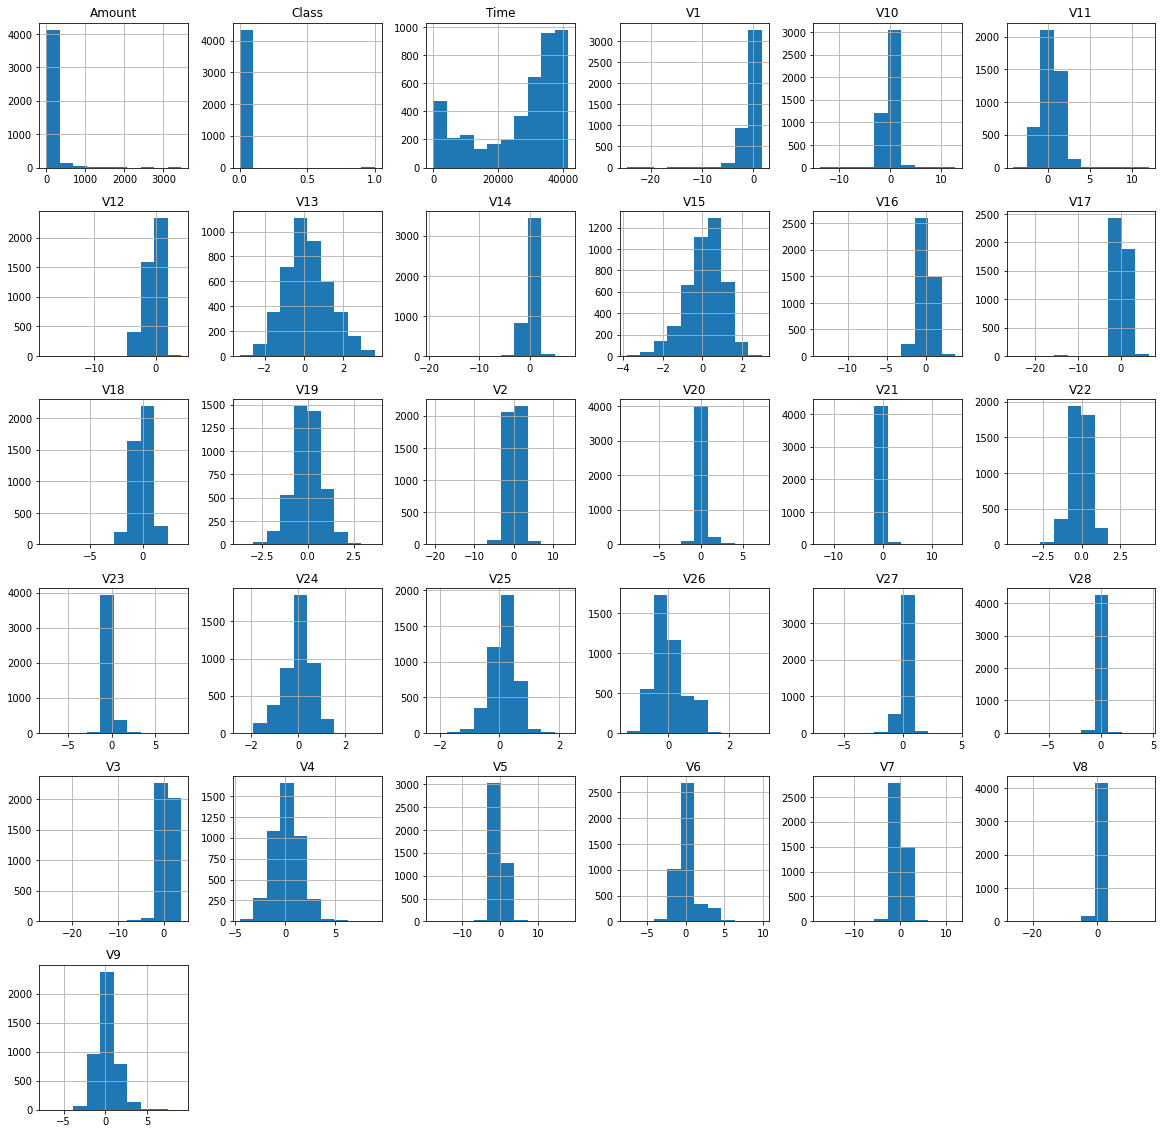

In [0]:
#plot histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [0]:
#determine fraud cases in dataset
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases:{}'.format(len(Fraud)))
print('Valid Cases:{}'.format(len(Valid)))

0.0036781609195402297
Fraud Cases:16
Valid Cases:4350


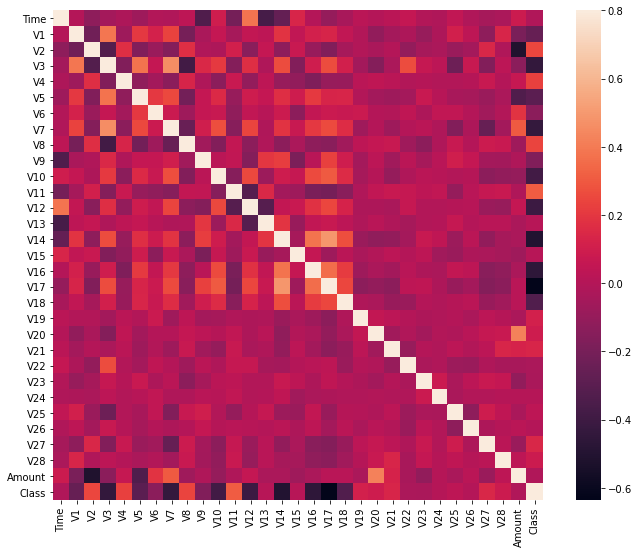

In [0]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=.8,square= True)
plt.show()

In [0]:
#get all the columns from the dataframe
columns = data.columns.tolist()

#filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['Class']]

#store the variable we all willl be predecting on
target = 'Class'

X=data[columns]
Y=data[target]

#print the shapes of X and Y
print(X.shape)
print(Y.shape)

(4366, 30)
(4366,)


In [0]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import  LocalOutlierFactor

#define a random state
state=1

#define the outlier detection methods
classifiers = {
    "Isolation Forest":IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)
}

In [0]:
#Fit the model
n_outliers = len(Fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):

  #fit the data and tag outliers
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X)
    scores_pred = clf.negative_outlier_factor_
  else:
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)

   #Reshape the prediction values to 0 for valid,1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred!=Y).sum()

    #Run classification Matrix
    print('():{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

():Isolation Forest
0.9970224461749886
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4350
         1.0       0.59      0.62      0.61        16

    accuracy                           1.00      4366
   macro avg       0.79      0.81      0.80      4366
weighted avg       1.00      1.00      1.00      4366

